<a href="https://colab.research.google.com/github/SACaesar/DataAnalysis/blob/main/Chapter5_yourturn_answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# To be completed at the Live Session and in your own time.

These set of examples we will help you get familiar with non parametric tests and correlations within a Jupyter notebook.   The questions coloured green are important practice for CA, particularly Question 5.

Before attempting these examples, please ensure you have read through [Chapter 5 Jupyter Notebook](https://github.com/haleygomez/Data-Analysis-2022/blob/master/blended_exercises/Chapter%205/Chapter5.ipynb) and have completed the Learning Central **Chapter 5 quiz**. 

***

#  Hypothesis Testing


## <font color=#30a64d>Question</font> 

The datafile [worldpopulation.txt](https://github.com/haleygomez/Data-Analysis-2022/blob/master/blended_exercises/Chapter4/worldpopulation.txt) contains the world population size measured since 1960. Plot the data (you will need to upload the datafile to your Google Colab). <br><br>

1. Measure the correlation coefficient using the in built Python package for Spearman's $\rho$ statistic. 

2. Measure it again but this time creating the functions to calculate Spearman's $\rho$ from scratch.   You can use the in-built function to rank datasets from scipy.stats: `from scipy.stats import rankdata`.

### Answer

Spearman's rank correlation is given by:

$\rho_s = \dfrac{\sum_{i = 1}^N  \,R(x_i)\,R(y_i) - N(N + 1)^2/4} {\sqrt{\sum_{i = 1}^N  \,R(x_i)^2 - N(N + 1)^2/4} \sqrt{\sum_{i = 1}^N  \,R(y_i)^2 - N(N + 1)^2/4}}$

1. First we'll calculate $\rho$ using the in-built python function.

In [ ]:
import numpy as np
from scipy.stats import spearmanr

data = np.genfromtxt('files_needed/worldpopulation.txt')

corr, _ = spearmanr(data[0], data[1])
print('The Spearman rho correlation for the world population growth is: %.5f' % corr)

The Spearman rho correlation for the world population growth is: 1.00000


2. Now calculate $\rho$ by hand using the information in Chapter 5 notebook.

In [ ]:
from scipy.stats import rankdata

# how many data points do we have?
N = len(data[0])

# let's rank the data
r_x = rankdata(data[0])
r_y = rankdata(data[1])

# need to set up equation for spearman rho
def rho_s(rank_x,rank_y,N):
    top = np.sum(rank_x*rank_y) - (N*(N+1)**2./4)
    bottom_1 = np.sqrt( np.sum(rank_x**2.) - (N*(N+1)**2./4)   )  
    bottom_2 = np.sqrt( np.sum(rank_y**2.) - (N*(N+1)**2./4)   )
    rho = top / (bottom_1*bottom_2)
    return rho

rho = rho_s(r_x,r_y,N)
print('Spearman rank statistic is {:.3f}'.format(rho))

Spearman rank statistic is 1.000


***

# KS Test

## Question

Two near-by apple trees are in bloom in an otherwise empty field. One is a Whitney Crab the other is a Redwell. We want to test if bees prefer one tree to the other.

To do this we collect data. We use a stop watch to time how long a bee stays near a particular tree. We begin to time when the bee touches the tree, we stop timing when the bee is more than a metre from the tree. Unfortunately we did not get exactly the same number of bees for each tree as it started to rain.   The data is below (time is in seconds). Can we conclude anything based on our experiment?

redwell= 23.4, 30.9, 18.8, 23.0, 21.4, 1, 24.6, 23.8, 24.1, 18.7, 16.3, 20.3, 14.9, 35.4, 21.6, 21.2, 21.0, 15.0, 15.6, 24.0, 34.6, 40.9, 30.7, 24.5, 16.6, 1, 21.7, 1, 23.6, 1, 25.7, 19.3, 46.9, 23.3, 21.8, 33.3, 24.9, 24.4, 1, 19.8, 17.2, 21.5, 25.5, 23.3, 18.6, 22.0, 29.8, 33.3, 1, 21.3, 18.6, 26.8, 19.4, 21.1, 21.2, 20.5, 19.8, 26.3, 39.3, 21.4, 22.6, 1, 35.3, 7.0, 19.3, 21.3, 10.1, 20.2, 1, 36.2, 16.7, 21.1, 39.1, 19.9, 32.1, 23.1, 21.8, 30.4, 19.62, 15.5 

whitney=16.5, 1, 22.6, 25.3, 23.7, 1, 23.3, 23.9, 16.2, 23.0, 21.6, 10.8, 12.2, 23.6, 10.1, 24.4, 16.4, 11.7, 17.7, 34.3, 24.3, 18.7, 27.5, 25.8, 22.5, 14.2, 21.7, 1, 31.2, 13.8, 29.7, 23.1, 26.1, 25.1, 23.4, 21.7, 24.4, 13.2, 22.1, 26.7, 22.7, 1, 18.2, 28.7, 29.1, 27.4, 22.3, 13.2, 22.5, 25.0, 1, 6.6, 23.7, 23.5, 17.3, 24.6, 27.8, 29.7, 25.3, 19.9, 18.2, 26.2, 20.4, 23.3, 26.7, 26.0, 1, 25.1, 33.1, 35.0, 25.3, 23.6, 23.2, 20.2, 24.7, 22.6, 39.1, 26.5, 22.7

### Answer

The null hypothesis is that there is no difference in the datasets, ie that bees do not prefer one tree over the other. Let's first look at the data.

Text(0.5, 0, 'time bees spent at tree')

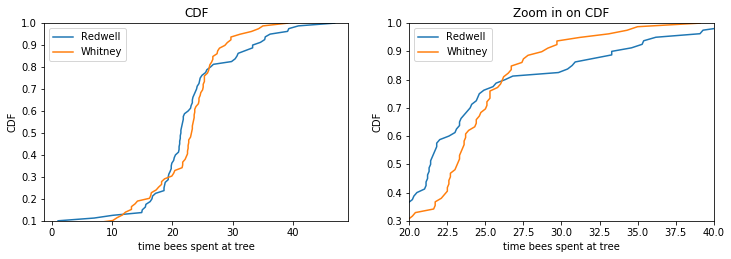

In [ ]:
import pylab as plt
%matplotlib inline

redwell = [23.4, 30.9, 18.8, 23.0, 21.4, 1, 24.6, 23.8, 24.1, 18.7, 16.3, 20.3, 14.9, 35.4, 21.6, 21.2, 21.0, 15.0, 15.6, 24.0, 34.6, 40.9, 30.7, 24.5, 16.6, 1, 21.7, 1, 23.6, 1, 25.7, 19.3, 46.9, 23.3, 21.8, 33.3, 24.9, 24.4, 1, 19.8, 17.2, 21.5, 25.5, 23.3, 18.6, 22.0, 29.8, 33.3, 1, 21.3, 18.6, 26.8, 19.4, 21.1, 21.2, 20.5, 19.8, 26.3, 39.3, 21.4, 22.6, 1, 35.3, 7.0, 19.3, 21.3, 10.1, 20.2, 1, 36.2, 16.7, 21.1, 39.1, 19.9, 32.1, 23.1, 21.8, 30.4, 19.62, 15.5] 

whitney = [16.5, 1, 22.6, 25.3, 23.7, 1, 23.3, 23.9, 16.2, 23.0, 21.6, 10.8, 12.2, 23.6, 10.1, 24.4, 16.4, 11.7, 17.7, 34.3, 24.3, 18.7, 27.5, 25.8, 22.5, 14.2, 21.7, 1, 31.2, 13.8, 29.7, 23.1, 26.1, 25.1, 23.4, 21.7, 24.4, 13.2, 22.1, 26.7, 22.7, 1, 18.2, 28.7, 29.1, 27.4, 22.3, 13.2, 22.5, 25.0, 1, 6.6, 23.7, 23.5, 17.3, 24.6, 27.8, 29.7, 25.3, 19.9, 18.2, 26.2, 20.4, 23.3, 26.7, 26.0, 1, 25.1, 33.1, 35.0, 25.3, 23.6, 23.2, 20.2, 24.7, 22.6, 39.1, 26.5, 22.7]

#make a function to plot the cumulative distribution function for the samples
def cdf(x):
    xs = np.sort(x)
    # this basically makes a cumulative distribution function
    ys = np.arange(1, len(xs)+1)/float(len(xs))
    return xs, ys

r_t,r_cdf = cdf(redwell)
w_t,w_cdf = cdf(whitney)

plt.figure(figsize=(12,8))
plt.subplot(221)
plt.plot(r_t,r_cdf,label='Redwell')
plt.plot(w_t,w_cdf,label='Whitney')

#plt.xlim(0.1,100)
plt.ylim(0.1,1)
plt.legend()
plt.title('CDF')
plt.ylabel('CDF')
plt.xlabel('time bees spent at tree')

plt.subplot(222)
plt.plot(r_t,r_cdf,label='Redwell')
plt.plot(w_t,w_cdf,label='Whitney')

plt.xlim(20,40)
plt.ylim(0.3,1)
plt.legend()
plt.title('Zoom in on CDF')
plt.ylabel('CDF')
plt.xlabel('time bees spent at tree')


In [ ]:
from scipy.stats import ks_2samp
results = ks_2samp(redwell,whitney)

print('D is {:.3f}'.format(results[0]))
print('The p value is {:.4f}'.format(results[1]))

D is 0.220
The p value is 0.0339


The result is a 96.5 percent chance of these distributions being different.  Or we can state that this is below the significance level of 0.05. We can conclude that we can reject the null hypothesis that the bees do not prefer one tree over another.

***

# Chi square test

## Question

You publish flyers for an event in three different colours and want to test whether the colour has a significant affect on whether people take them. The data is available below.  Use the $\chi^2$ test to do this, and calculate the probability of the significance of the result.

| |white | light blue | neon pink | Totals|
|---|---|---|---|---|
|Take | 32| 38 | 20| 90| 
|Don't take | 8| 22 |30 | 60| 
|Totals | 40|60 | 50| 150| 

### Answer

Expected values are calculated eg for white flier and take, we have 90 taken with 40/150 total ie E = $90/150=60$% of 40 white fliers are taken.  Therefore expected value is 24.

| |white | light blue | neon pink | Totals|
|---|---|---|---|---|
|Take | 32 [E=24] | 38 [E=36]| 20 [E=30]| 90| 
|Don't take | 8 [E=16]| 22 [E=24] |30 [E=20]| 60| 
|Totals | 40|60 | 50| 150| 

Number degrees of freedom is $n_{\rm data} - n_{\rm params} = 6 - 4 = 2$.


In [ ]:
observed = np.array([32.,38.,20.,8.,22.,30.])
expected = np.array([24.,36.,30.,16.,24.,20.])

chi_squared =np.sum((observed - expected)**2.0/expected)
print('chi-squared statistic for colour of fliers and taking them is {:.2f}'.format(chi_squared))

chi-squared statistic for colour of fliers and taking them is 15.28


This is higher than the value of critical $\chi^2$ for $\alpha=0.05$ - it's at the prob $< 0.001$ level using the probabilitiy table for chi-squared, therefore this result is highly significant and we can reject the null hypothesis.

***